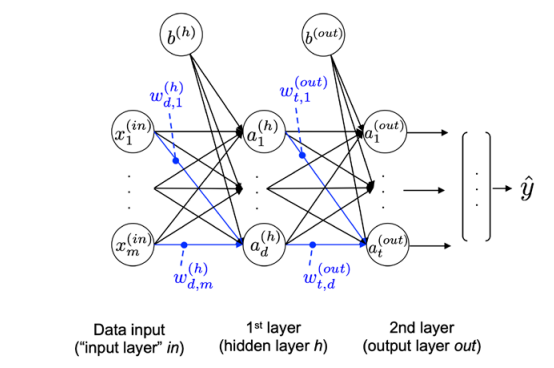

$ a_i^{(l)}$ the i th activation unit in the l th layer

input = n x m matrix

d = number of hidden units

m = number of input features

t = number of output units 

In [6]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values
X = ((X / 255.) - .5) * 2

In [11]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=5000, random_state=42, stratify=y_temp)

In [13]:
X.shape

(70000, 784)

In [12]:
import numpy as np

def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

##### MNIST NN layer
Use 1 Input, 1 Hidden, 1 Output Layer
1. input layer: m x features
2. hidden layer weight
    - weight_h: num_hidden x features
    - out: (m x features) x (weight_h.T) = (m x hidden_count)
3. output layer weight
    - weight_out: num_classes x hidden_count
    - out: (m x hidden_count) x (weight_out.T) = (m x num_classes)

In [ ]:
class NeuralNetMLP:
    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()
        self.num_classes = num_classes
        rng = np.random.RandomState(random_seed)

        self.weight_h = rng.normal(loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)

        self.weight_out = rng.normal(loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # Hidden layer
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out
    
    def backward(self, x, a_h, a_out, y):
        # Output layer
        y_oneshot = int_to_onehot(y, self.num_classes)
        # a_out = (m * num_classes)
        d_loss__d_a_out = 2. * (a_out - y_oneshot) / y.shape[0]
        

        
        